In [1]:
from keras.layers import Activation,Conv2D,Dense
from keras.layers import Dropout,Flatten,Input,MaxPooling2D
from keras import Model

#构建AlexNet模型
IMSIZE=227
input_layer=Input([IMSIZE,IMSIZE,3])
x=input_layer
#第一层卷积核为11*11
x=Conv2D(96,[11,11],strides=[4,4],activation="relu")(x)

#第二层为最大值池化
x=MaxPooling2D([3,3],strides=[2,2])(x)

#第三层的输入为第二池化输出，做规格大小为5*5的卷积
x=Conv2D(256,[5,5],padding="same",activation="relu")(x)
x=MaxPooling2D([3,3],strides=[2,2])(x)
x=Conv2D(384,[3,3],padding="same",activation="relu")(x)
x=Conv2D(384,[3,3],padding="same",activation="relu")(x)
x=Conv2D(256,[3,3],padding="same",activation="relu")(x)
x=MaxPooling2D([3,3],strides=[2,2])(x)
x=Flatten()(x)
x=Dense(4096,activation="relu")(x)
x=Dropout(0.5)(x)
x=Dense(4096,activation="relu")(x)
x=Dropout(0.5)(x)
x=Dense(2,activation="softmax")(x)
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)      

In [2]:
from keras.preprocessing.image import ImageDataGenerator

#统一原始图像的像素规格，不管输入图像是什么规格，输出一定是227*227像素
IMSIZE=227   
#validation_generator为生成的验证数据集
#从本地读取数据，将图像的像素取值转换为0-1
validation_generator= ImageDataGenerator(rescale=1./255).flow_from_directory(
    #由于/ChineseStyle/train目录下有两个不同的子目录，
    #一个是lishu,另一个是xingkai，所以这是一个二分类问题
    "E:/A大三下学期/深度学习实验/ChineseStyle/ChineseStyle/train",
    target_size=(IMSIZE,IMSIZE),
    batch_size=200,   #每次读两百张图像
    class_mode="categorical" #因变量为categorical，说明是一个分类问题。

)

#train_generator为生成的训练数据集
train_generator=ImageDataGenerator(rescale=1./255).flow_from_directory(
    "E:/A大三下学期/深度学习实验/ChineseStyle/ChineseStyle/train",
    target_size=(IMSIZE,IMSIZE),
    batch_size=200,
    class_mode="categorical"
)

Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


<Figure size 432x288 with 0 Axes>

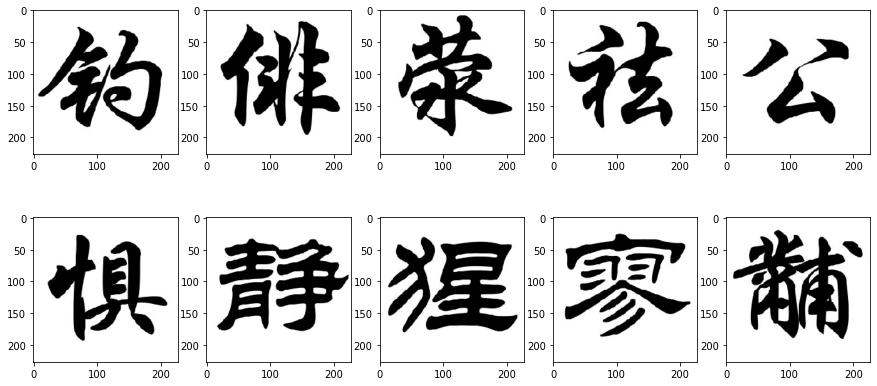

In [3]:
#输出图像
from matplotlib import pyplot as plt

plt.figure()
fig,ax=plt.subplots(2,5)        #将画板设定为2行5列的形式
fig.set_figheight(7)            #设高为7个单位
fig.set_figwidth(15)            #设宽为15个单位
ax=ax.flatten()                 #将每一个位置用ax记录下来
X,Y=next(validation_generator)  #将validation_generator数据生成器输入给一个特定的命令next()
for i in range(10):ax[i].imshow(X[i,:,:,:])  

In [4]:
#模型编译与拟合
from keras.optimizers import Adam
#损失函数指定为categorical_crossentropy,优化方法为Adam（学习速率为0.001），评价指标为预测精度。
model.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])
model.fit_generator(train_generator,epochs=2,validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
40/40 [==============================] - 707s 18s/step - loss: 0.8525 - accuracy: 0.7076 - val_loss: 0.0718 - val_accuracy: 0.9794
Epoch 2/2
40/40 [==============================] - 728s 18s/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0183 - val_accuracy: 0.9942
